In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

In [2]:
XRANGE = np.pi / 8
YRANGE = np.pi / 8
WIDTH = 500
HEIGHT = 500
DEPSILON = 0.001

In [3]:
phi_x = np.linspace(start=-XRANGE, stop=XRANGE, num=WIDTH)
phi_y = np.linspace(start=-YRANGE, stop=YRANGE, num=HEIGHT)

In [4]:
phi_xy = np.stack(np.meshgrid(phi_x, phi_y), axis=-1)

In [5]:
rays = np.stack(( np.cos(phi_xy[:,:,1]) * np.sin(phi_xy[:,:,0]), 
                  np.sin(phi_xy[:,:,1]), 
                 -np.cos(phi_xy[:,:,1]) * np.cos(phi_xy[:,:,0])), axis=-1)

In [11]:
def dist_sphere(position, sphere):
    return np.sqrt(np.sum((position - sphere) ** 2, axis=-1)) - 1

  0%|          | 0/500 [00:00<?, ?it/s]

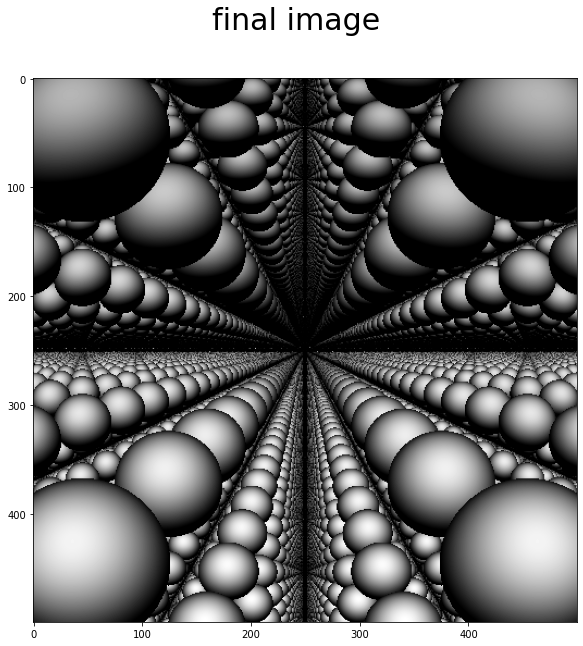

In [31]:
def dist(position):
    return dist_sphere(position % 5., [2.5, 2.5, 2.5])

position_new = np.zeros((HEIGHT, WIDTH, 3))
dist_new = dist(position_new)

for _ in tqdm(range(500)):
    position_old = position_new
    dist_old = dist_new

    position_new = position_old + np.repeat(dist_old, 3, axis=-1).reshape(HEIGHT, WIDTH, 3) * rays
    dist_new = dist(position_new)

dist_dx = dist(position_new + np.array([DEPSILON, 0, 0])) - dist_old
dist_dy = dist(position_new + np.array([0, DEPSILON, 0])) - dist_old
dist_dz = dist(position_new + np.array([0, 0, DEPSILON])) - dist_old

dist_gradient = np.stack((dist_dx, dist_dy, dist_dz), axis=-1) / DEPSILON
dist_gradient /= np.repeat(np.sqrt(np.sum(dist_gradient ** 2, axis=-1)), 3).reshape(HEIGHT, WIDTH, 3)

light_source = np.array([0, 1, -1])
light_source = light_source / np.sqrt(np.sum(light_source ** 2))

final_image = np.sum(dist_gradient * rays, axis=-1) * np.sum(dist_gradient * light_source, axis=-1)
final_image = np.maximum(final_image, 0.)

plt.subplots(figsize=(10, 10))
plt.suptitle('final image', fontsize=30)
plt.imshow(final_image, cmap='gray')
plt.show()

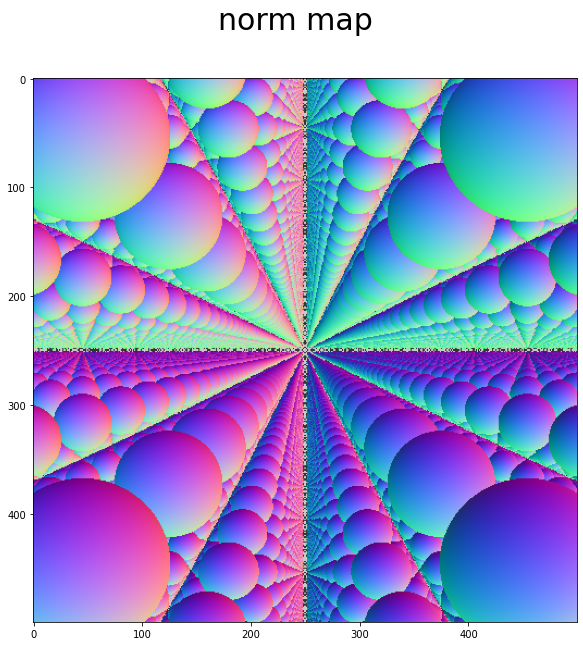

In [32]:
plt.subplots(figsize=(10, 10))
plt.suptitle('norm map', fontsize=30)
plt.imshow((dist_gradient + 1.) / 2.)
plt.show()